# Task 01: Iron K-$\alpha$ line profile

Influence of a point-like microlens on the observed profile of the Fe Kalpha spectral line emitted from a relativistic accretion disk which simulated image is stored in the specified input FITS file.

In [16]:
#import necessary packages

import numpy as np
from astropy.io import fits
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.pyplot import *
rcParams.update({'font.family':'serif','font.size':14,'figure.figsize':[11.69,8.27]})

In [17]:
#formulas

# Distance from the point-like microlens
def u(x,y,xd,yd,re):
    return np.sqrt((x-xd)**2+(y-yd)**2)/re

# Amplification of the point-like microlens
def amp(x,y,xd,yd,re):
    d=u(x,y,xd,yd,re)
    a=np.full(np.shape(d),np.inf)
    ind=np.where(d!=0)
    a[ind]=(d[ind]**2+2.0)/(d[ind]*np.sqrt(d[ind]**2+4.0))
    return a


Disk parameters:
a = 0.002, i = 75.0 deg, Rin = 6.0 Rg, Rout = 30.0 Rg, q = -2.5



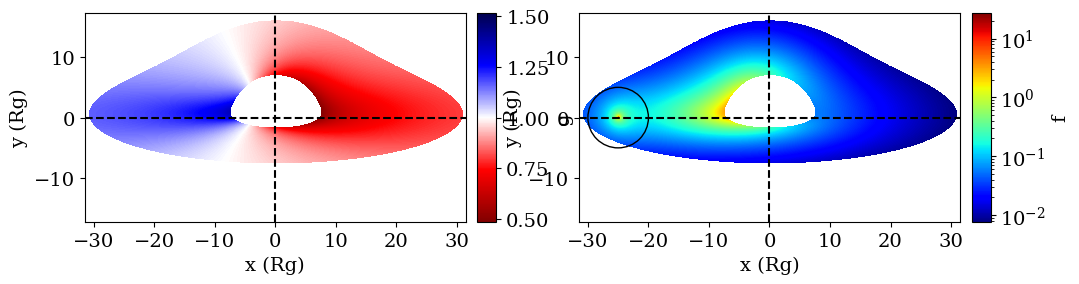

In [18]:
#reading FITS data

# Input FITS file name (without extension)
filename='disk'
# Number of the spectral line bins
nbin=100
# Coordinates and projected Einstein radius (all in UNITS OF R_g) of the point-like microlens
xd=-25.0 #CHANGE HERE
yd=0.0
re=5.0

# Create the necessary I/O file names
fitsfile=filename+'.fits.gz'
linedat='line_x'+str(xd)+'_y'+str(yd)+'.dat'
jpgfig=filename+'_x'+str(xd)+'_y'+str(yd)+'.jpg'

# Read the primary HDU header
h0=fits.getheader(fitsfile,0)
a=h0["SPIN"]
theta=h0["ANGLE"]
rin=h0["RINN"]
rout=h0["ROUT"]
q=h0["INDEX"]
print("\nDisk parameters:\na = ",a,", i = ",theta," deg, Rin = ",rin," Rg, Rout = ",rout," Rg, q = ",q,"\n",sep='')

# Read the data and header from the shift image
g,h1=fits.getdata(fitsfile,'SHIFT',header=True)
nx=h1["NAXIS1"]
ny=h1["NAXIS2"]
c1=h1["CONTENT"]
xt=h1["CTYPE1"]
yt=h1["CTYPE2"]
xu=h1["CUNIT1"]
yu=h1["CUNIT2"]
i0=h1["CRPIX1"]
j0=h1["CRPIX2"]
x0=h1["CRVAL1"]
y0=h1["CRVAL2"]
dx=h1["CDELT1"]
dy=h1["CDELT2"]

# Extents of x and y axes
xext=(i0-1)*dx
yext=(j0-1)*dy

# Read the data and header from the flux image
f,h2=fits.getdata(fitsfile,'FLUX',header=True)
c2=h2["CONTENT"]

# Undeformed line profile
gg=g[~np.isnan(g)]
ff=f[~np.isnan(f)]
# The bin edges
gbin=np.linspace(0.0,2.0,nbin+1)
# Find the indices of the bins to which each shift belongs
inds=np.digitize(gg,gbin)
# Sum the corresponding fluxes in each bin
fobs=np.zeros(nbin)
for i in range(np.size(gg)):
    fobs[inds[i]-1]+=ff[i]
# Normalize the maximum flux to 1
fmax=max(fobs)
fobs/=fmax
# Find the bin centers
gobs=(gbin[:nbin]+gbin[1:nbin+1])/2.0

# Amplified disk flux due to microlensing
x=np.linspace(-xext,xext,nx)
y=np.linspace(-yext,yext,ny)
xi,yi=np.meshgrid(x,y,sparse=False,indexing='xy')
f*=amp(xi,yi,xd,yd,re)

# Microlensed line profile normalized to its undeformed profile
ff=f[~np.isnan(f)]
# Sum the corresponding fluxes in each bin
fml=np.zeros(nbin)
for i in range(np.size(gg)):
    fml[inds[i]-1]+=ff[i]
fml/=fmax

# Save the spectral line profile
np.savetxt(linedat,np.transpose([gobs,fobs,fml]),fmt='%.7f %.7f %.7f')

# Plot the shift image of the disk
gext=max(1.0-np.nanmin(g),np.nanmax(g)-1.0)
subplot(221)
im=imshow(g,extent=[-xext,xext,yext,-yext],cmap='seismic_r',vmin=1.0-gext,vmax=1.0+gext)
locator_params(axis='x',nbins=7)
xlabel(xt+' ('+xu+')')
ylabel(yt+' ('+yu+')')
axhline(0,color='k',linestyle='--')
axvline(0,color='k',linestyle='--')
ax=gca()
ax.invert_yaxis()
divider=make_axes_locatable(ax)
cax=divider.append_axes("right","5%",pad="3%")
cbar=colorbar(im,cax=cax)
cbar.set_label(c1)

# Plot the flux image of the disk
subplot(222)
im=imshow(f,extent=[-xext,xext,yext,-yext],cmap='jet',norm=LogNorm(clip=True))
locator_params(axis='x',nbins=7)
# Projected Einstein ring of the microlens
gca().add_artist(Circle((xd,yd),re,color='k',fill=False))
xlabel(xt+' ('+xu+')')
ylabel(yt+' ('+yu+')')
axhline(0,color='k',linestyle='--')
axvline(0,color='k',linestyle='--')
ax=gca()
ax.invert_yaxis()
divider=make_axes_locatable(ax)
cax=divider.append_axes("right","5%",pad="3%")
cbar=colorbar(im,cax=cax)
cbar.set_label(c2)

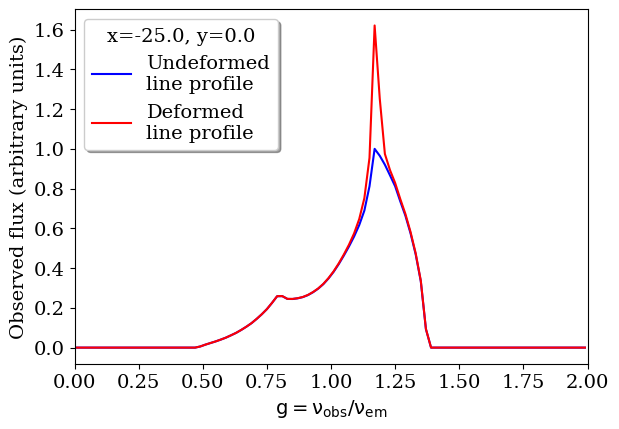

In [19]:
# Plot the undeformed and deformed line profiles
subplot(223)
plot(gobs,fobs,'b-',gobs,fml,'r-')
xlim(0.0,2.0)
xlabel(r'$\mathsf{g=\nu_{obs}/\nu_{em}}$')
ylabel('Observed flux (arbitrary units)')
legend(['Undeformed\nline profile','Deformed\nline profile'],loc=2,title='x='+str(xd)+', y='+str(yd),fancybox=True,shadow=True)
subplots_adjust(wspace=0.3,hspace=0.3)
tight_layout()
savefig(jpgfig,dpi=300,bbox_inches='tight')
show()

# Task 02: Fits view

Read and display the specified FITS image.

In [20]:
# import packages
from numpy import *
from astropy.io import fits
from matplotlib.pyplot import *

(2000, 2000)


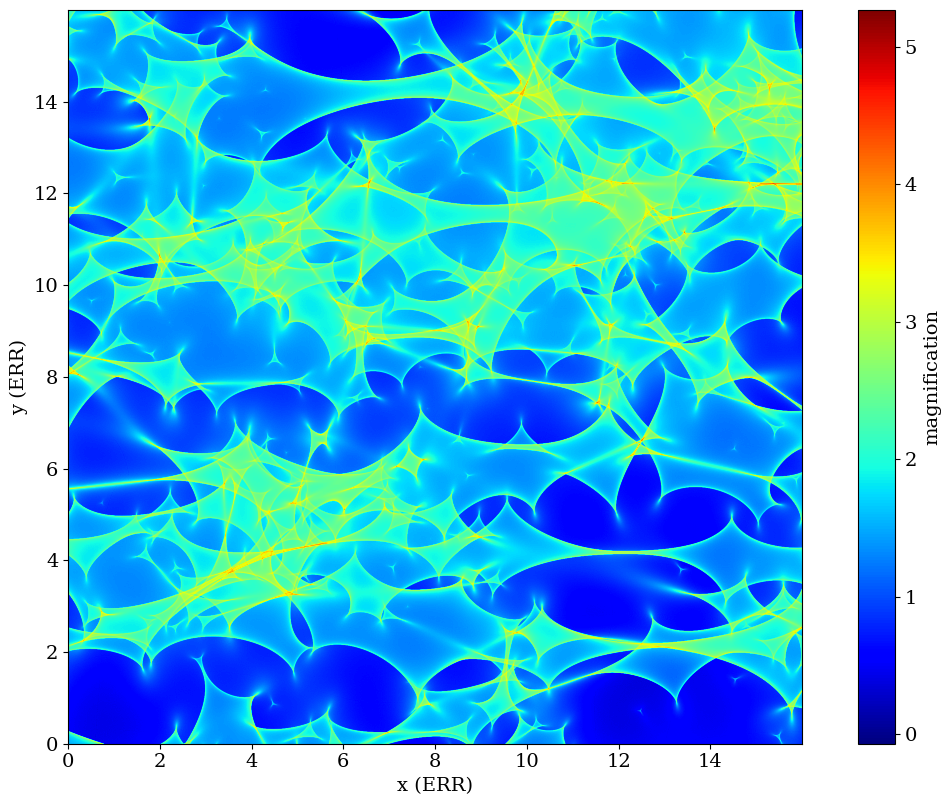

In [21]:
# Input FITS file name (without extension)
filename='mlmap'

# Create the necessary I/O file names
input_fits=filename+'.fits.gz'
output_fig=filename+'.jpg'

# Read the data and header from input FITS file
data,header=fits.getdata(input_fits,header=True)
print(data.shape)
nx=header["NAXIS1"]
ny=header["NAXIS2"]
ct=header["CONTENT"]
xt=header["CTYPE1"]
yt=header["CTYPE2"]
xu=header["CUNIT1"]
yu=header["CUNIT2"]
i0=header["CRPIX1"]
j0=header["CRPIX2"]
x0=header["CRVAL1"]
y0=header["CRVAL2"]
dx=header["CDELT1"]
dy=header["CDELT2"]

# Extents of x and y axes
if i0==(nx+1)/2:
    xmin=-(i0-1)*dx
    xmax=(i0-1)*dx
else:
    xmin=x0
    xmax=x0+(nx-1)*dx
if j0==(ny+1)/2:
    ymin=-(j0-1)*dy
    ymax=(j0-1)*dy
else:
    ymin=y0
    ymax=y0+(ny-1)*dy

# Plot the input image versus axes in real units
imshow(data,extent=[xmin,xmax,ymax,ymin],cmap='jet')
xlabel(xt+' ('+xu+')')
ylabel(yt+' ('+yu+')')
gca().invert_yaxis()
cbar=colorbar(format='%1.2g')
cbar.set_label(ct)
tight_layout()
savefig(output_fig,dpi=300,bbox_inches='tight')
show()

# Task 02: Circular source

In [29]:
#!/usr/bin/python3

#
# Calculate a circular source with 2D Gaussian brightness distrubution,
# read the input microlensing magnification map and convolve it with
# the source. Save the output into the specified FITS files.
#

from numpy import *
from scipy.signal import fftconvolve
from astropy.io import fits
from matplotlib.pyplot import *

# Save either extended source (ft==1), or microlensing map (ft!=1)
# into the specified FITS file
def save_fits(ft,fname,z,i0,dx,j0,dy):
    h=fits.Header()
    if ft==1:
        h.set('CONTENT','brightness','file contains extended circular source')
    else:
        h.set('CONTENT','magnification','file contains microlensing magnification map')
    h.set('CTYPE1','x','type of data axis 1')
    h.set('CUNIT1','ERR','units of data axis 1')
    h.set('CRPIX1',i0,'reference pixel of data axis 1')
    h.set('CRVAL1',0.,'coordinate of reference pixel of data axis 1')
    h.set('CDELT1',dx,'increment (pixel size) along data axis 1')
    h.set('CTYPE2','y','type of data axis 2')
    h.set('CUNIT2','ERR','units of data axis 2')
    h.set('CRPIX2',j0,'reference pixel of data axis 2')
    h.set('CRVAL2',0.,'coordinate of reference pixel of data axis 2')
    h.set('CDELT2',dy,'increment (pixel size) along data axis 2')
    h.set('ORIGIN','P. Jovanovic (AOB)','origin of FITS file')
    hdu=fits.PrimaryHDU(data=z,header=h)
    hdu.writeto(fname)
    return

# Input file name of the mcrolensing map (without extension)
inpfil='mlmap'
# Ouput file name of the extended source (without extension)
outfil='source1'
# Radius of the extended circular source and standard deviation
# of its Gaussian brightness distrubution (both in ERR)
rs=0.8
ss=0.4

# Create the necessary I/O FITS file names
input_fits=inpfil+'.fits.gz'
output_fits1=outfil+'.fits.gz'
output_fits2=inpfil+'_'+outfil+'.fits.gz'

# Read the data and header from input FITS file
data,header=fits.getdata(input_fits,header=True)
nx=header["NAXIS1"]
ny=header["NAXIS2"]
dx=header["CDELT1"]
dy=header["CDELT2"]

# Create the extended circular source with 2d Gaussian distribution of brightness
m=int(rs/dx+0.5)
n=int(rs/dy+0.5)
x=arange(-m,m+1,1,float)*dx
y=arange(-n,n+1,1,float)*dy
xx,yy=meshgrid(x,y)
z=exp(-(xx*xx+yy*yy)/(2.0*ss*ss))
z[where(xx*xx+yy*yy>rs*rs)]=nan

# Write the extended source image into the first output FITS file
save_fits(1,output_fits1,z,m+1,dx,n+1,dy)
fits.info(output_fits1)

# First normalize the source so that its total brightness becomes equal to 1,
# then convolve the input microlensing magnification map with the normalized
# source, and finally keep only the relevant central part of the convolution
z[isnan(z)]=0.0
z=z/sum(z)
c=fftconvolve(data,z)
c=c[m:m+nx,n:n+ny]

# Write the microlensing magnification map for the extended source into
# the second output FITS file
save_fits(2,output_fits2,c,1,dx,1,dy)
fits.info(output_fits2)

Filename: source1.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   (201, 201)   float64   
Filename: mlmap_source1.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   (2000, 2000)   float64   


# Take a look at the source files 1 and 2 generated

(201, 201)


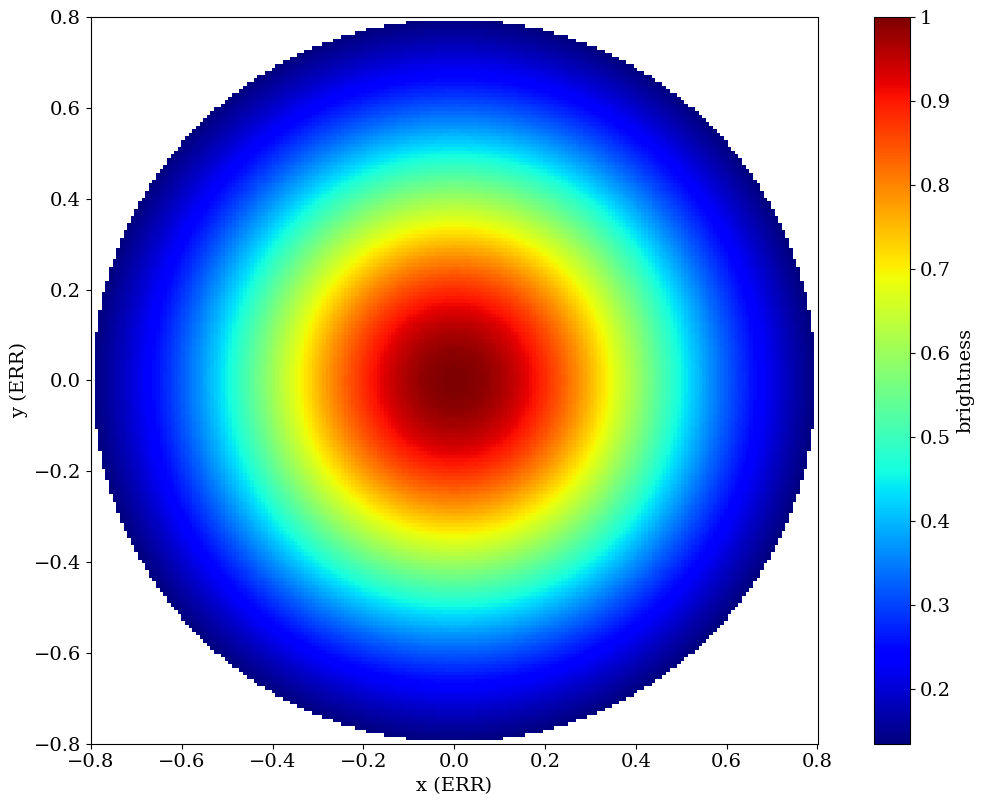

In [30]:
# Input FITS file name (without extension)
filename='source1'

# Create the necessary I/O file names
input_fits=filename+'.fits.gz'
output_fig=filename+'.jpg'

# Read the data and header from input FITS file
data,header=fits.getdata(input_fits,header=True)
print(data.shape)
nx=header["NAXIS1"]
ny=header["NAXIS2"]
ct=header["CONTENT"]
xt=header["CTYPE1"]
yt=header["CTYPE2"]
xu=header["CUNIT1"]
yu=header["CUNIT2"]
i0=header["CRPIX1"]
j0=header["CRPIX2"]
x0=header["CRVAL1"]
y0=header["CRVAL2"]
dx=header["CDELT1"]
dy=header["CDELT2"]

# Extents of x and y axes
if i0==(nx+1)/2:
    xmin=-(i0-1)*dx
    xmax=(i0-1)*dx
else:
    xmin=x0
    xmax=x0+(nx-1)*dx
if j0==(ny+1)/2:
    ymin=-(j0-1)*dy
    ymax=(j0-1)*dy
else:
    ymin=y0
    ymax=y0+(ny-1)*dy

# Plot the input image versus axes in real units
imshow(data,extent=[xmin,xmax,ymax,ymin],cmap='jet')
xlabel(xt+' ('+xu+')')
ylabel(yt+' ('+yu+')')
gca().invert_yaxis()
cbar=colorbar(format='%1.2g')
cbar.set_label(ct)
tight_layout()
savefig(output_fig,dpi=300,bbox_inches='tight')
show()

# Task 02: FITS view of convolved map source_1 with mlmap (microlensing map)

(2000, 2000)


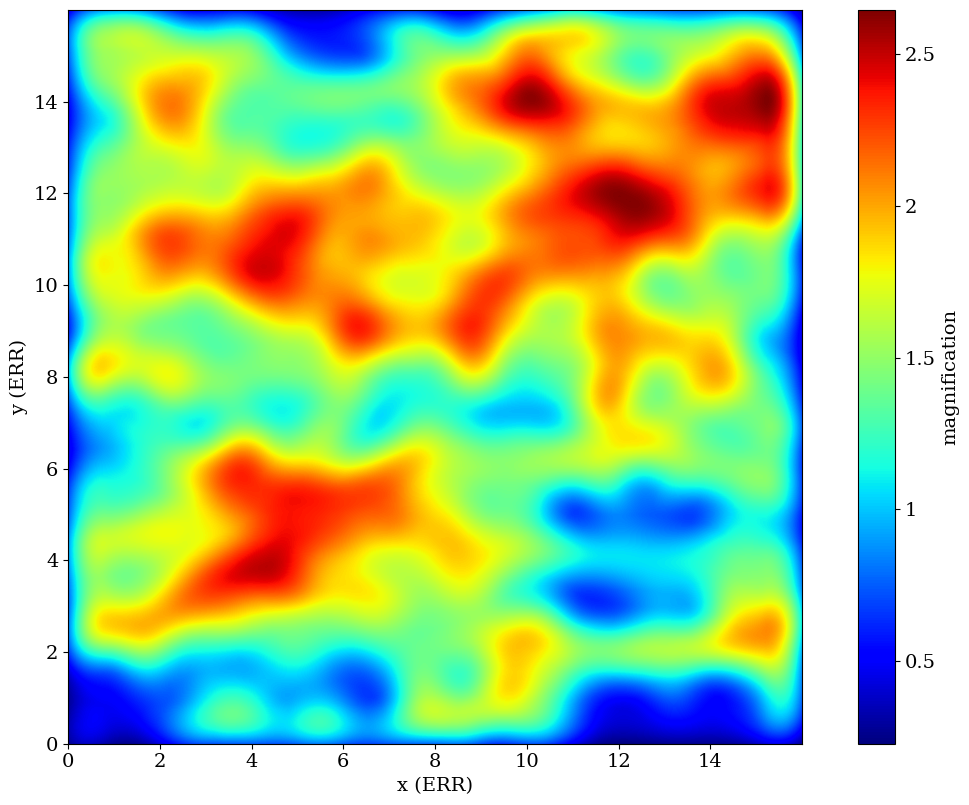

In [31]:
# Input FITS file name (without extension)
filename='mlmap_source1'

# Create the necessary I/O file names
input_fits=filename+'.fits.gz'
output_fig=filename+'.jpg'

# Read the data and header from input FITS file
data,header=fits.getdata(input_fits,header=True)
print(data.shape)
nx=header["NAXIS1"]
ny=header["NAXIS2"]
ct=header["CONTENT"]
xt=header["CTYPE1"]
yt=header["CTYPE2"]
xu=header["CUNIT1"]
yu=header["CUNIT2"]
i0=header["CRPIX1"]
j0=header["CRPIX2"]
x0=header["CRVAL1"]
y0=header["CRVAL2"]
dx=header["CDELT1"]
dy=header["CDELT2"]

# Extents of x and y axes
if i0==(nx+1)/2:
    xmin=-(i0-1)*dx
    xmax=(i0-1)*dx
else:
    xmin=x0
    xmax=x0+(nx-1)*dx
if j0==(ny+1)/2:
    ymin=-(j0-1)*dy
    ymax=(j0-1)*dy
else:
    ymin=y0
    ymax=y0+(ny-1)*dy

# Plot the input image versus axes in real units
imshow(data,extent=[xmin,xmax,ymax,ymin],cmap='jet')
xlabel(xt+' ('+xu+')')
ylabel(yt+' ('+yu+')')
gca().invert_yaxis()
cbar=colorbar(format='%1.2g')
cbar.set_label(ct)
tight_layout()
savefig(output_fig,dpi=300,bbox_inches='tight')
show()

# Task 2: Changing to source 2 (sharper lens)

Calculate a circular source with 2D Gaussian brightness distrubution, read the input microlensing magnification map and convolve it with the source. Save the output into the specified FITS files.

In [32]:
# Save either extended source (ft==1), or microlensing map (ft!=1)
# into the specified FITS file
def save_fits(ft,fname,z,i0,dx,j0,dy):
    h=fits.Header()
    if ft==1:
        h.set('CONTENT','brightness','file contains extended circular source')
    else:
        h.set('CONTENT','magnification','file contains microlensing magnification map')
    h.set('CTYPE1','x','type of data axis 1')
    h.set('CUNIT1','ERR','units of data axis 1')
    h.set('CRPIX1',i0,'reference pixel of data axis 1')
    h.set('CRVAL1',0.,'coordinate of reference pixel of data axis 1')
    h.set('CDELT1',dx,'increment (pixel size) along data axis 1')
    h.set('CTYPE2','y','type of data axis 2')
    h.set('CUNIT2','ERR','units of data axis 2')
    h.set('CRPIX2',j0,'reference pixel of data axis 2')
    h.set('CRVAL2',0.,'coordinate of reference pixel of data axis 2')
    h.set('CDELT2',dy,'increment (pixel size) along data axis 2')
    h.set('ORIGIN','P. Jovanovic (AOB)','origin of FITS file')
    hdu=fits.PrimaryHDU(data=z,header=h)
    hdu.writeto(fname)
    return

# Input file name of the mcrolensing map (without extension)
inpfil='mlmap'
# Ouput file name of the extended source (without extension)
outfil='source2'
# Radius of the extended circular source and standard deviation
# of its Gaussian brightness distrubution (both in ERR)
rs=0.8
ss=0.1

# Create the necessary I/O FITS file names
input_fits=inpfil+'.fits.gz'
output_fits1=outfil+'.fits.gz'
output_fits2=inpfil+'_'+outfil+'.fits.gz'

# Read the data and header from input FITS file
data,header=fits.getdata(input_fits,header=True)
nx=header["NAXIS1"]
ny=header["NAXIS2"]
dx=header["CDELT1"]
dy=header["CDELT2"]

# Create the extended circular source with 2d Gaussian distribution of brightness
m=int(rs/dx+0.5)
n=int(rs/dy+0.5)
x=arange(-m,m+1,1,float)*dx
y=arange(-n,n+1,1,float)*dy
xx,yy=meshgrid(x,y)
z=exp(-(xx*xx+yy*yy)/(2.0*ss*ss))
z[where(xx*xx+yy*yy>rs*rs)]=nan

# Write the extended source image into the first output FITS file
save_fits(1,output_fits1,z,m+1,dx,n+1,dy)
fits.info(output_fits1)

# First normalize the source so that its total brightness becomes equal to 1,
# then convolve the input microlensing magnification map with the normalized
# source, and finally keep only the relevant central part of the convolution
z[isnan(z)]=0.0
z=z/sum(z)
c=fftconvolve(data,z)
c=c[m:m+nx,n:n+ny]

# Write the microlensing magnification map for the extended source into
# the second output FITS file
save_fits(2,output_fits2,c,1,dx,1,dy)
fits.info(output_fits2)

Filename: source2.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   (201, 201)   float64   
Filename: mlmap_source2.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   (2000, 2000)   float64   


(201, 201)


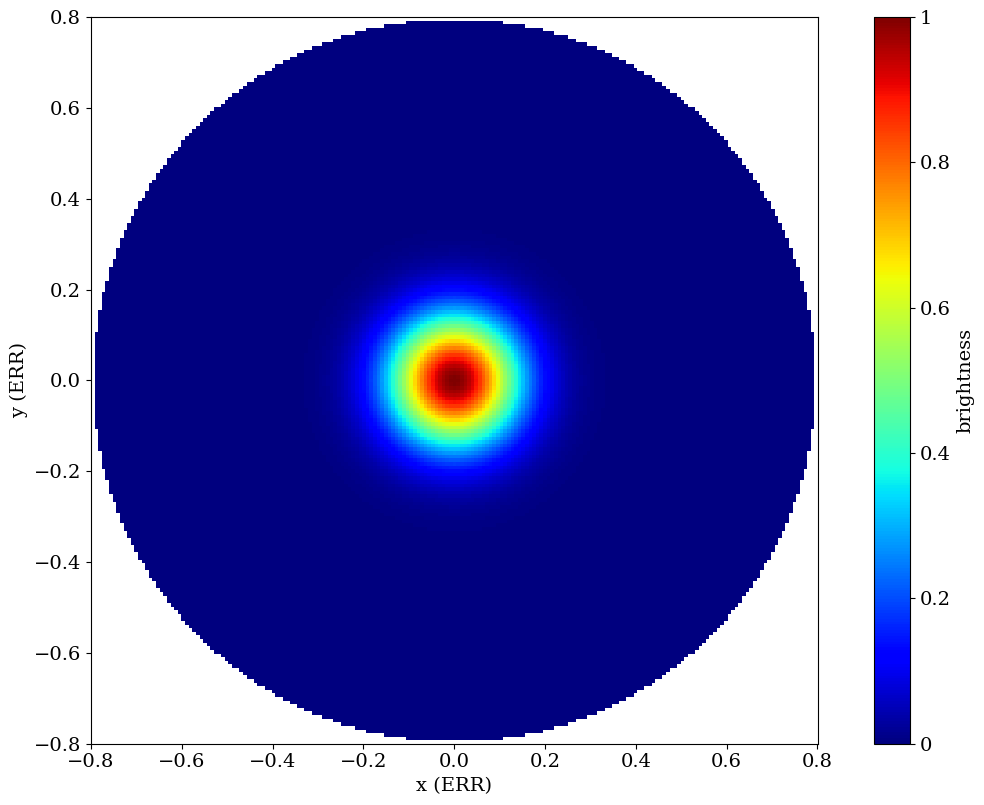

In [33]:
# Input FITS file name (without extension)
filename='source2'

# Create the necessary I/O file names
input_fits=filename+'.fits.gz'
output_fig=filename+'.jpg'

# Read the data and header from input FITS file
data,header=fits.getdata(input_fits,header=True)
print(data.shape)
nx=header["NAXIS1"]
ny=header["NAXIS2"]
ct=header["CONTENT"]
xt=header["CTYPE1"]
yt=header["CTYPE2"]
xu=header["CUNIT1"]
yu=header["CUNIT2"]
i0=header["CRPIX1"]
j0=header["CRPIX2"]
x0=header["CRVAL1"]
y0=header["CRVAL2"]
dx=header["CDELT1"]
dy=header["CDELT2"]

# Extents of x and y axes
if i0==(nx+1)/2:
    xmin=-(i0-1)*dx
    xmax=(i0-1)*dx
else:
    xmin=x0
    xmax=x0+(nx-1)*dx
if j0==(ny+1)/2:
    ymin=-(j0-1)*dy
    ymax=(j0-1)*dy
else:
    ymin=y0
    ymax=y0+(ny-1)*dy

# Plot the input image versus axes in real units
imshow(data,extent=[xmin,xmax,ymax,ymin],cmap='jet')
xlabel(xt+' ('+xu+')')
ylabel(yt+' ('+yu+')')
gca().invert_yaxis()
cbar=colorbar(format='%1.2g')
cbar.set_label(ct)
tight_layout()
savefig(output_fig,dpi=300,bbox_inches='tight')
show()

(2000, 2000)


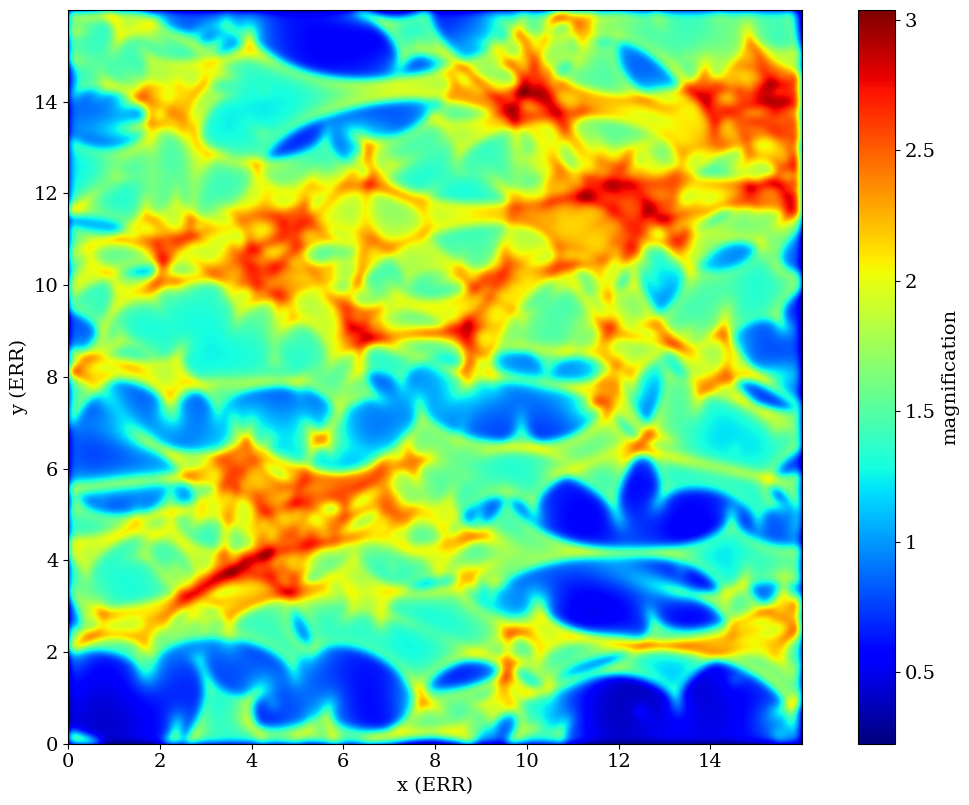

In [34]:
# Input FITS file name (without extension)
filename='mlmap_source2'

# Create the necessary I/O file names
input_fits=filename+'.fits.gz'
output_fig=filename+'.jpg'

# Read the data and header from input FITS file
data,header=fits.getdata(input_fits,header=True)
print(data.shape)
nx=header["NAXIS1"]
ny=header["NAXIS2"]
ct=header["CONTENT"]
xt=header["CTYPE1"]
yt=header["CTYPE2"]
xu=header["CUNIT1"]
yu=header["CUNIT2"]
i0=header["CRPIX1"]
j0=header["CRPIX2"]
x0=header["CRVAL1"]
y0=header["CRVAL2"]
dx=header["CDELT1"]
dy=header["CDELT2"]

# Extents of x and y axes
if i0==(nx+1)/2:
    xmin=-(i0-1)*dx
    xmax=(i0-1)*dx
else:
    xmin=x0
    xmax=x0+(nx-1)*dx
if j0==(ny+1)/2:
    ymin=-(j0-1)*dy
    ymax=(j0-1)*dy
else:
    ymin=y0
    ymax=y0+(ny-1)*dy

# Plot the input image versus axes in real units
imshow(data,extent=[xmin,xmax,ymax,ymin],cmap='jet')
xlabel(xt+' ('+xu+')')
ylabel(yt+' ('+yu+')')
gca().invert_yaxis()
cbar=colorbar(format='%1.2g')
cbar.set_label(ct)
tight_layout()
savefig(output_fig,dpi=300,bbox_inches='tight')
show()

## Task 02: Microlensing (Pazchynki) light curves

Microlensing light curves for a point-like and two extended circular sources, moving with the given effective velocity

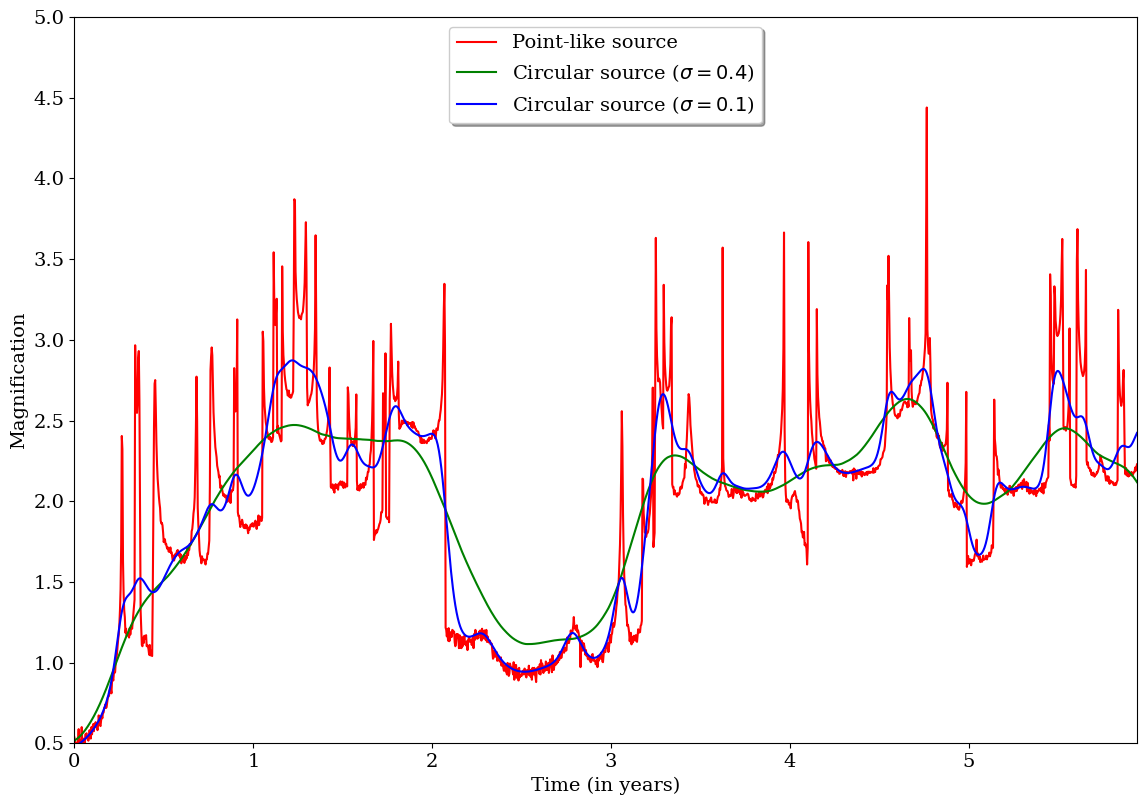

In [35]:
# Coordinates of the start and end point (in ERR)
pos1=[1.0,1.0]
pos2=[15.0,15.0]
# Redshift of the lens
zd=0.5
# Effective velocity of the source (in ERR/yr)
vs=5.0

# Read the data and header from the 1st input FITS file
z1,header=fits.getdata('mlmap.fits.gz',header=True)
dx=header["CDELT1"]
dy=header["CDELT2"]
# Read the data from the 2nd input FITS file
z2=fits.getdata('mlmap_source1.fits.gz')
# Read the data from the 3rd input FITS file
z3=fits.getdata('mlmap_source2.fits.gz')

# Map the start and end coordinates to their pixel indices
i1=int(pos1[0]/dx+0.5)
i2=int(pos2[0]/dx+1.5)
j1=int(pos1[1]/dy+0.5)
j2=int(pos2[1]/dy+1.5)

# Diagonal distances from the start point
x=arange(i1,i2,1,float)*dx
y=arange(j1,j2,1,float)*dy
d=sqrt((x-x[0])**2+(y-y[0])**2)

# The corresponding time scale
t=(1.0+zd)*d/vs

# The corresponding magnifications in all 3 maps
m1=diagonal(z1[i1:i2,j1:j2])
m2=diagonal(z2[i1:i2,j1:j2])
m3=diagonal(z3[i1:i2,j1:j2])

# Save and plot the light curves
savetxt('light_curves.dat',transpose([t,m1,m2,m3]),fmt='%.7f %.7f %.7f %.7f')
plot(t,m1,'r-',t,m2,'g-',t,m3,'b-')
xlim(0.0,max(t))
ylim(0.5,5.0)
xlabel('Time (in years)')
ylabel('Magnification')
legend(['Point-like source',r'Circular source ($\sigma=0.4$)',r'Circular source ($\sigma=0.1$)'],loc='upper center',fancybox=True,shadow=True)
tight_layout()
savefig('light_curves.jpg',dpi=300,bbox_inches='tight')
show()

# Task 03
Calculate the crossing times in the case of a "typical" lens (zl = 0.5, zs = 2)
and Einstein Cross (zl = 0.04, zs = 1.695) for a microlens crossing with an
effective velocity of 600 km/s over a source with 100 AU in size. Assume a flat
cosmological model with H0 = 75 km/s/Mpc, Omega_M = 0.3 and Omega_Lambda = 0.7.

In [36]:
#!/usr/bin/env python3

from numpy import *
from scipy.integrate import quad

# Integrand for comoving distance
def ez(z,om):
    return 1.0/sqrt(om*pow(1.0+z,3.0)+1.0-om)

# Comoving distance (eq. 15 in Hogg 2000)
def dc(z,om,h0):
    return 299792.458*quad(ez,0.0,z,args=(om))[0]/h0

# Angular diameter distance (eq. 18 in Hogg 2000)
def da(z,om,h0):
    return dc(z,om,h0)/(1.0+z)

zl=float(input('Enter the lens redshift: '))
zs=float(input('Enter the source redshift: '))
rs=float(input('Enter the source radius (in km): '))
vs=float(input('Enter the effective source velocity (in km/s): '))
h0=float(input('Enter the Hubble constant (in km/s/Mpc): '))
om=float(input('Enter the Omega_matter: '))

dl=da(zl,om,h0)
ds=da(zs,om,h0)
tc=(1.0+zl)*dl*rs/(vs*ds)
# Convert tc from seconds to days
tc=tc/86400.0

print('\nAngular diameter distance of the lens: {0:.1f} Mpc'.format(dl))
print('Angular diameter distance of the source: {0:.1f} Mpc'.format(ds))
print('Microlensing crossing time {0:.1f} days'.format(tc))

Enter the lens redshift:  5
Enter the source redshift:  6
Enter the source radius (in km):  20000
Enter the effective source velocity (in km/s):  30
Enter the Hubble constant (in km/s/Mpc):  87
Enter the Omega_matter:  0.27



Angular diameter distance of the lens: 1079.3 Mpc
Angular diameter distance of the source: 982.2 Mpc
Microlensing crossing time 0.1 days


In [37]:
zl=float(input('Enter the lens redshift: '))
zs=float(input('Enter the source redshift: '))
rs=float(input('Enter the source radius (in km): '))
vs=float(input('Enter the effective source velocity (in km/s): '))
h0=float(input('Enter the Hubble constant (in km/s/Mpc): '))
om=float(input('Enter the Omega_matter: '))

dl=da(zl,om,h0)
ds=da(zs,om,h0)
tc=(1.0+zl)*dl*rs/(vs*ds)
# Convert tc from seconds to days
tc=tc/86400.0

print('\nAngular diameter distance of the lens: {0:.1f} Mpc'.format(dl))
print('Angular diameter distance of the source: {0:.1f} Mpc'.format(ds))
print('Microlensing crossing time {0:.1f} days'.format(tc))

Enter the lens redshift:  5
Enter the source redshift:  6
Enter the source radius (in km):  20000
Enter the effective source velocity (in km/s):  30
Enter the Hubble constant (in km/s/Mpc):  87
Enter the Omega_matter:  0.27



Angular diameter distance of the lens: 1079.3 Mpc
Angular diameter distance of the source: 982.2 Mpc
Microlensing crossing time 0.1 days
